# 2. Machine Learning Basics: Predicting Kubernetes Incidents - Part 1

## Introduction

Welcome to the second notebook in our series on AI for Kubernetes operations! In this notebook, we’ll take a foundational step into **machine learning** and build a simple model to predict Kubernetes incidents, such as `Normal` or `Warning`, based on operational metrics.

### Real-World Context
Imagine a Kubernetes cluster where resource allocation spikes often lead to instability. By using machine learning, we can predict such incidents before they occur, enabling proactive measures like scaling resources or redistributing workloads.

### Objectives
By the end of this notebook, you will:
- Understand the basics of **artificial intelligence (AI)** and **machine learning (ML)**.
- Learn the concept of **supervised learning** and its relevance to Kubernetes.
- Build and evaluate a simple **Decision Tree Classifier** to predict incidents.
- Visualize and interpret model predictions using intuitive charts and metrics.

### Key Features
This notebook includes:
- A concise explanation of AI, ML, and supervised learning.
- A hands-on guide to training a **Decision Tree Classifier**.
- Interactive visualizations, such as scatter plots and confusion matrices, to interpret model performance.

## What is AI and Machine Learning?

![The Map of Artificial Intelligence (2020)](https://miro.medium.com/v2/resize:fit:600/format:webp/1*cjpGPJaaoc9jUX9TpPI20Q.jpeg)

*(Source: Medium - Viacheslav Osaulenko)*

### What is Artificial Intelligence (AI)?
- AI enables systems to perform tasks that typically require human intelligence.
- It was invented to automate repetitive and complex tasks, reduce human error, and process vast amounts of data faster than humans could.
- Examples in Kubernetes include:
  - Predicting incidents to improve reliability.
  - Optimizing resource allocation to prevent overprovisioning.

### What is Machine Learning (ML)?
- ML is a subset of AI where machines learn from data to make predictions or decisions without explicit programming.
- It was developed to solve problems where explicit rule-based programming is impractical due to complexity or variability in data.
- For example, manually coding rules to predict Kubernetes incidents is inefficient; ML models can learn patterns from historical data instead.

### Types of Machine Learning
- **Supervised Learning**: Learns from labeled data (e.g., predicting incidents as `Normal` or `Warning`).
- **Unsupervised Learning**: Identifies patterns in unlabeled data (e.g., anomaly detection).
- **Reinforcement Learning**: Learns optimal actions through rewards and penalties (e.g., scaling clusters dynamically).

### Why Use Supervised Learning for Kubernetes?
Supervised learning helps detect patterns in labeled data, making it ideal for predicting specific incidents based on historical metrics.

## 1. Install Required Libraries

Run the following command to install the necessary libraries:

In [10]:
# Install required libraries
%pip install pandas scikit-learn matplotlib seaborn notebook nbformat --quiet

Note: you may need to restart the kernel to use updated packages.


## 2. Creating a Simple Dataset

Let’s start with a small dataset to illustrate the basics of supervised learning. This dataset includes:
- `cpu_allocation_efficiency`: CPU usage as a fraction of total available.
- `memory_allocation_efficiency`: Memory usage as a fraction of total available.
- `event_type`: Label indicating whether the system is `Normal` or under a `Warning` condition.

In [11]:
# Import necessary library
import pandas as pd

# Create a structured in-memory dataset
data = {
    "cpu_allocation_efficiency": [0.3, 0.9, 0.5, 0.7, 0.8, 0.2, 0.95, 0.6, 0.4, 0.85],
    "memory_allocation_efficiency": [
        0.4,
        0.85,
        0.3,
        0.75,
        0.9,
        0.2,
        0.95,
        0.65,
        0.5,
        0.8,
    ],
    "event_type": [
        "Normal",
        "Warning",
        "Normal",
        "Warning",
        "Warning",
        "Normal",
        "Warning",
        "Normal",
        "Normal",
        "Warning",
    ],
}

# Create the DataFrame
df_simple = pd.DataFrame(data)

# Display the dataset
df_simple

,cpu_allocation_efficiency,memory_allocation_efficiency,event_type
0,0.30,0.40,Normal
1,0.90,0.85,Warning
2,0.50,0.30,Normal
3,0.70,0.75,Warning
4,0.80,0.90,Warning
5,0.20,0.20,Normal
6,0.95,0.95,Warning
7,0.60,0.65,Normal
8,0.40,0.50,Normal
9,0.85,0.80,Warning


## 3. Splitting the Data: Training and Testing

To train and evaluate a machine learning model, it’s essential to split the dataset into two parts:

1. **Training Data (70%)**:
   - Used to train the model.
   - The model learns patterns and relationships in this subset of data.

2. **Testing Data (30%)**:
   - Used to evaluate the model’s performance on unseen data.
   - Ensures the model generalizes well and avoids overfitting.

### Why Split the Data?
- **Prevent Overfitting**: Training on all data can lead to overfitting, where the model memorizes the data but performs poorly on unseen examples.
- **Measure Generalization**: Testing on unseen data evaluates how well the model generalizes to new data, critical for real-world use.

### Steps to Split the Data
In this example:
- **Features (X)**: `cpu_allocation_efficiency` and `memory_allocation_efficiency`.
- **Target (y)**: `event_type`.

Let’s use the `train_test_split` function from `scikit-learn` to split the dataset.

In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_simple[["cpu_allocation_efficiency", "memory_allocation_efficiency"]]
y = df_simple["event_type"]

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Display the shapes of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (7, 2)
Testing features shape: (3, 2)


## 4. Training a Decision Tree Model

A **Decision Tree Classifier** is a simple and interpretable machine learning algorithm used for classification tasks. It splits data into smaller subsets based on the most informative features. Each split is based on a condition that maximizes the separation of classes (e.g., `Normal` vs. `Warning`).

Below is a visual example of a decision tree:

![Decision Tree Example](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)  
*(Source: Wikipedia)*

### Why Use a Decision Tree?
- **Interpretability**: Decision Trees are easy to understand and visualize, mimicking human decision-making.
- **Handles Non-Linear Data**: They work well with both linear and non-linear relationships in data.
- **Drawbacks**: They can overfit small datasets, but this can be mitigated by limiting the tree’s depth.

Let’s train a Decision Tree Classifier and evaluate its performance.

In [13]:
# Import DecisionTreeClassifier and accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


## 5. Interpreting a Prediction

After training the model, the next step is to **interpret its predictions**. Understanding how the model makes decisions is crucial for gaining confidence in its outputs and identifying areas for improvement.

In this section, we will:
1. Select a single test sample.
2. Display the sample’s features and actual incident type.
3. Show the model’s predicted incident type.

### Single Prediction Example

Let’s pick a sample from the test set and see how the model performs:

In [14]:
# Select a single test sample
sample_index = 0  # You can change this to test other samples
sample_features = X_test.iloc[sample_index]
sample_features_df = pd.DataFrame([sample_features], columns=X_test.columns)

# Predict the incident type for the selected sample
sample_prediction = model.predict(sample_features_df)
actual_label = y_test.iloc[sample_index]

# Display results
print(f"Input Features: {sample_features.to_dict()}")
print(f"Predicted Incident: {sample_prediction[0]}")
print(f"Actual Incident: {actual_label}")

Input Features: {'cpu_allocation_efficiency': 0.4, 'memory_allocation_efficiency': 0.5}
Predicted Incident: Normal
Actual Incident: Normal


### What Does This Show?

1. **Input Features**:
   - The `cpu_allocation_efficiency` and `memory_allocation_efficiency` metrics provided to the model.

2. **Predicted Incident**:
   - The model’s classification (`Normal` or `Warning`).

3. **Actual Incident**:
   - The ground truth label from the dataset.

## 6. Visualizing Predictions

Visualizations help us understand how well the model performs. In this section, we’ll:
1. Compare **actual vs. predicted labels**.
2. Use a **scatter plot** to visualize classification results.
3. Evaluate model performance using a **confusion matrix**.

### Scatter Plot: Actual vs. Predicted Labels
Each point represents an incident with its CPU and memory allocation efficiencies plotted. The color indicates whether it was classified as `Normal` or `Warning`.

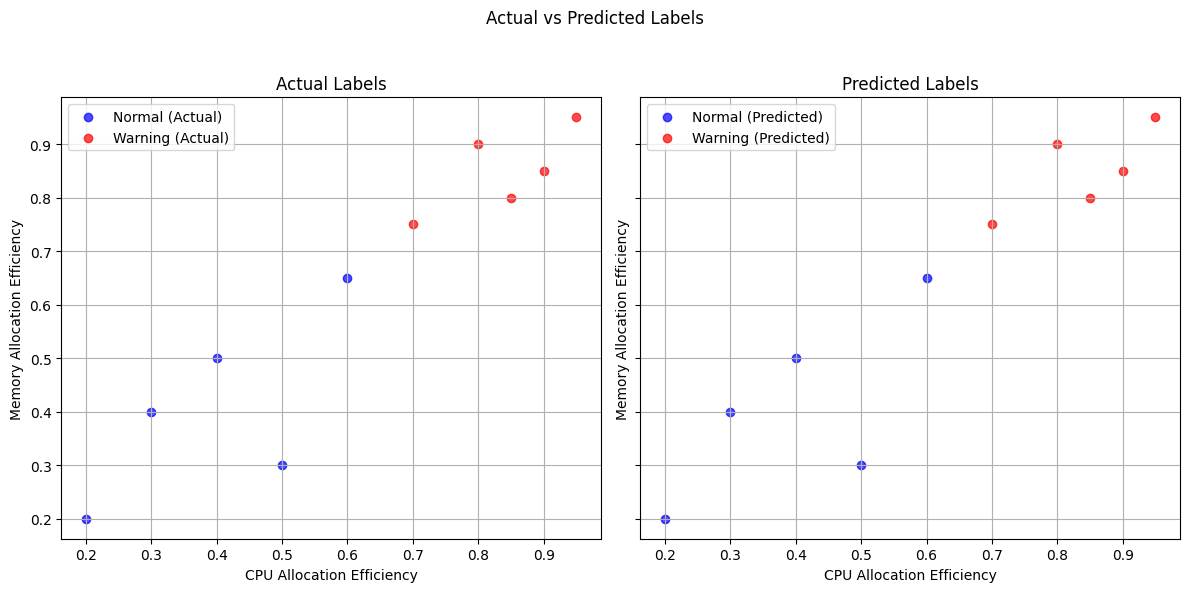

In [15]:
import matplotlib.pyplot as plt

# Add predictions to the dataset
df_simple["predicted_event"] = model.predict(X)

# Function to add scatter plots for a category (e.g., Normal, Warning)
def add_scatter_plot(ax, data, category, label_type, color):
    filtered_data = (
        data[data["event_type"] == category]
        if label_type == "Actual"
        else data[data["predicted_event"] == category]
    )
    ax.scatter(
        filtered_data["cpu_allocation_efficiency"],
        filtered_data["memory_allocation_efficiency"],
        color=color,
        label=f"{category} ({label_type})",
        alpha=0.7,
    )

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Add scatter plots for Actual Labels
add_scatter_plot(axs[0], df_simple, "Normal", label_type="Actual", color="blue")
add_scatter_plot(axs[0], df_simple, "Warning", label_type="Actual", color="red")

# Add scatter plots for Predicted Labels
add_scatter_plot(axs[1], df_simple, "Normal", label_type="Predicted", color="blue")
add_scatter_plot(axs[1], df_simple, "Warning", label_type="Predicted", color="red")

# Set titles, labels, legends, and grids
for ax, title in zip(axs, ["Actual Labels", "Predicted Labels"]):
    ax.set_title(title)
    ax.set_xlabel("CPU Allocation Efficiency")
    ax.set_ylabel("Memory Allocation Efficiency")
    ax.legend()
    ax.grid(True)  # Add grid to the subplot

# Adjust layout
fig.suptitle("Actual vs Predicted Labels")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

### Confusion Matrix
A **confusion matrix** provides a summary of prediction results, showing:
- **True Positives (TP)**: Correctly predicted `Normal` incidents.
- **True Negatives (TN)**: Correctly predicted `Warning` incidents.
- **False Positives (FP)**: Predicted `Normal` when it was actually `Warning`.
- **False Negatives (FN)**: Predicted `Warning` when it was actually `Normal`.

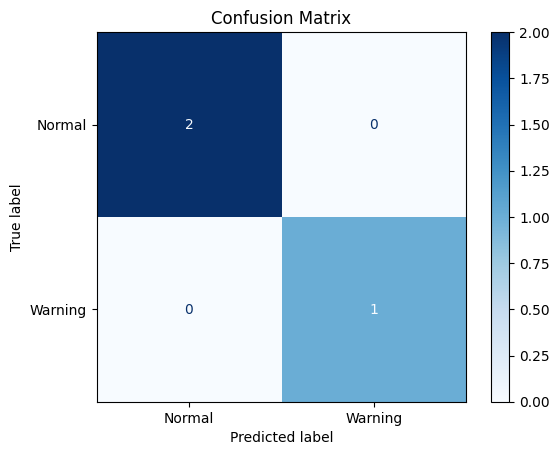

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=["Normal", "Warning"], cmap="Blues"
)
plt.title("Confusion Matrix")
plt.show()

## 7. Conclusion

In this notebook, we:
1. Explored a simple dataset of Kubernetes metrics.
2. Built and evaluated a **Decision Tree Classifier** to predict incidents (`Normal` or `Warning`).
3. Visualized the model’s performance using scatter plots and a confusion matrix.

### Key Takeaways
- **Supervised Learning**: Decision Trees are interpretable and suitable for binary classification tasks like incident prediction.
- **Model Limitations**: While effective on small datasets, Decision Trees may overfit. Advanced methods like Random Forests or Gradient Boosting can improve performance.
- **Visualization**: Scatter plots and confusion matrices help diagnose model performance and identify misclassifications.

### Next Steps
In the next notebook, we will:
- Use a more complex, real-world Kubernetes dataset.
- Explore advanced models like **Random Forests** and **Gradient Boosting**.
- Analyze feature importance to understand what metrics most influence incident predictions.